<a href="https://colab.research.google.com/github/ebercab7/fcomputacional/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparación de los datos**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
# %matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ebercab7/fcomputacional/main/Actividad1/8270%20diario.txt"

# Se nombran las columnas del df
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último (skiprows), afirmamos que no nay encabezado (header=None)
# Se procesan los datos utilizando Python, engine='python' 

df_clima = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
# df_clima

# Se observa el encabezado y el final de los datos
# print(df_clima.head())
# print(df_clima.tail())

# Se observa la dimensión de los datos
# df_clima.shape

# Se observa la info de los datos
# df_clima.info()

# Se realiza una copia con la que trabajar para no perder el origigi
df_c=df_clima.copy()


# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)
# df_c.head()

# Se imprime la info actualizada del df
# df_c.info()
# print(df_c.head())

# Se procede a convertir los datos del clima a valores numericos para poder trabajar los datos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")


# Se observa que datos faltan
# df_c.isnull().sum()

# Breve analísis estadistico redondeado a 2 cifras.
# df_c.describe().round(2)

# Nueva copia de seguridad
df_c1 = df_c.copy()

#Asignando formato de fecha: (.copy necesario pq sino la hace de pancho)
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

# Se añaden las columnas de año y mes ademas de la de fecha
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month


# Observar una muestra aleatoria de 10 renglones
# df_c1.sample(10)



# **Preparación extra de los datos**

In [3]:
# Se elimina el formato numerico para el mes y se le coloca un formato de caracteres
# df_c1.drop sirve para elimnar la columna
df_c1.drop("Mes", axis=1, inplace=True)
# .dt.strftime es el comando que hace el cambio
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

# dc_c1.Tmax == dc_c1["Tmax"] no aplica aquí pues seleccionar colum con .Tmax no permite crear columnas, solo tomarlas y graficar, promediat etc

df_c1.head()


,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1920-02-01,0.0,NaN,14.0,NaN,1920,Feb
1,1920-02-02,0.0,NaN,10.0,-4.0,1920,Feb
2,1920-02-03,0.0,NaN,18.0,NaN,1920,Feb
3,1920-02-04,0.0,NaN,14.0,6.0,1920,Feb
4,1920-02-05,0.0,NaN,7.0,NaN,1920,Feb


# **Representación gráfica**

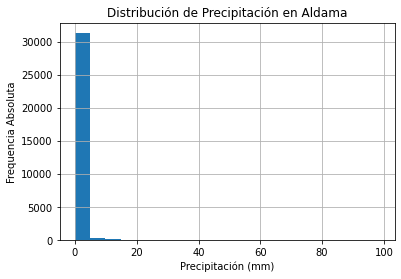

In [4]:

# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_c1.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Aldama')
plt.grid()
plt.show()



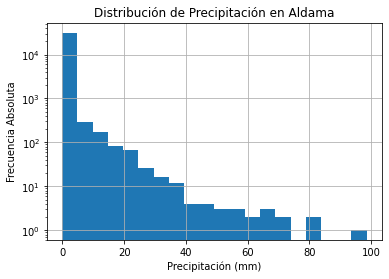

In [5]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje y para mejor visualización
plt.hist(df_c1.Precip, bins=20)
plt.yscale("log")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Precipitación en Aldama")
plt.grid()
plt.show()

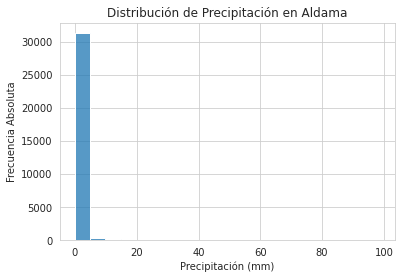

In [6]:
# Misma gráfica son Seaborn
sns.set_style("whitegrid")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Precipitación en Aldama")
sns.histplot(data=df_c1, x="Precip", bins=20);


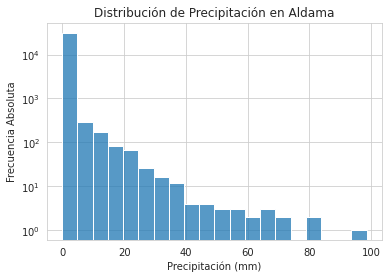

In [7]:
# Seaborn con escala log
sns.set_style("whitegrid")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Precipitación en Aldama")
sns.histplot(data=df_c1, x="Precip", bins=20, log_scale=(False,True));

# **Continuando con las graficas**

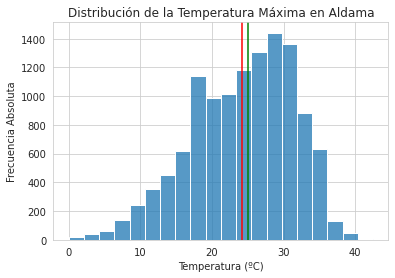

In [8]:
# Grafica (histograma) de temperatura maxima:
# Seleccionando estilo de la grafica
sns.set_style("whitegrid")

# Se obtienen cantidades especificas de interes a presentar
# Recordando que para seleccionar la columna Tmax se puede usar: dc_c1.Tmax == dc_c1["Tmax"]

tmed = df_c1.Tmax.median()
tprom = df_c1.Tmax.mean()

#Graficando, data es para tomar el data frame y con x o y se elgien los datos para cada eje.  Bins num de clases

sns.histplot(data=df_c1, x="Tmax", bins=20)

# Indicando que se añadan los valores de interes como lineas verticales con "axvline"
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

# Dando formato al grafico:

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de la Temperatura Máxima en Aldama")

# Printeando grafica
plt.show()

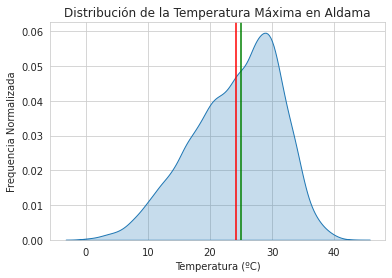

In [9]:
# Gráfica de la función de densidad de probabilidad o KDE (Kernel Density Estimate)
# Estilo
sns.set_style("whitegrid")

# Graficando los puntos y datos de interes
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

# Dando formato
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Aldama')

# Printeando grafica
plt.show()

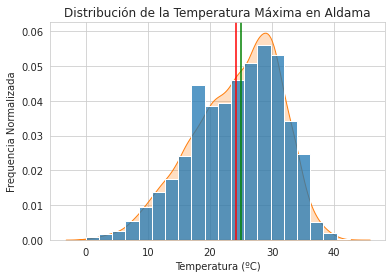

In [10]:
# Ahora, dada la relación de ambas, sobreponemos las dos ultimas graficas:
sns.set_style("whitegrid")

sns.histplot(data=df_c1, x="Tmax", bins=20, stat="density")
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Aldama')

plt.show()

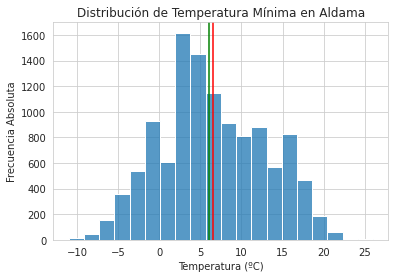

In [11]:
# Ahora se hará lo mismo para la temperatura minima
sns.set_style("whitegrid")
sns.histplot(data=df_c1, x="Tmin", bins=20)

tmin_prom=df_c1.Tmin.mean()
tmin_med=df_c1.Tmin.median()

plt.axvline(x=tmin_med, color="g")
plt.axvline(x=tmin_prom, color="r")
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Temperatura Mínima en Aldama")

plt.show()

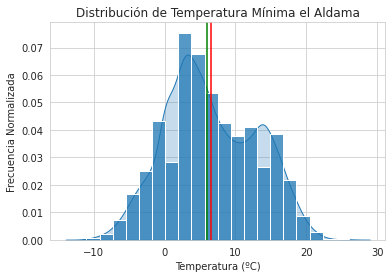

In [12]:
sns.set_style("whitegrid")
sns.kdeplot(df_c1.Tmin, fill=True)
sns.histplot(data=df_c1, x="Tmin", bins=20, stat="density")
plt.axvline(x=tmin_med, color ="g")
plt.axvline(x=tmin_prom, color="r")

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Distribución de Temperatura Mínima el Aldama")

plt.show()

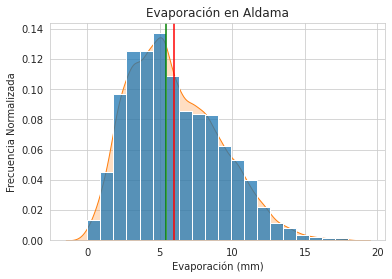

In [13]:
sns.set_style("whitegrid")
#al final de las instrucciones va ";" o "plt.show()" para que no muestre algun otro mensaje
sns.histplot(data=df_c1, x= "Evap", bins=20, stat="density")
sns.kdeplot(df_c1["Evap"], fill=True)

Emed=df_c1["Evap"].median()
Eprom=df_c1.Evap.mean()
plt.axvline(x=Emed, color="g")
plt.axvline(x=Eprom, color="r")

plt.xlabel("Evaporación (mm)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Evaporación en Aldama");





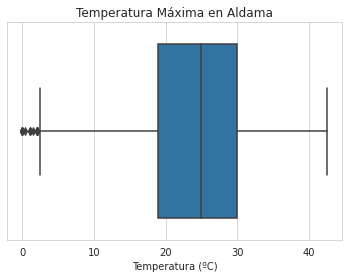

In [14]:
# Gráfica de caja (boxplot) para Tmax
sns.set_style("whitegrid")
# Podemos dar nombre a la grafica y a los ejes como se ha venido haciendo con plt.xlabel etc o con .set de SeaBorn.
sns.boxplot(data=df_c1, x="Tmax", orient="h").set(xlabel="Temperatura (ºC)", title = "Temperatura Máxima en Aldama");


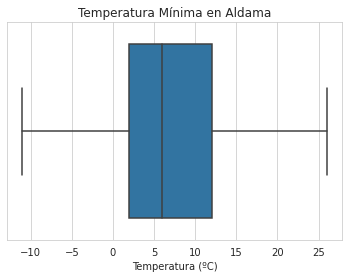

In [15]:
# boxplot para Tmin
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Tmin", orient="h")
plt.xlabel("Temperatura (ºC)")
plt.title("Temperatura Mínima en Aldama");

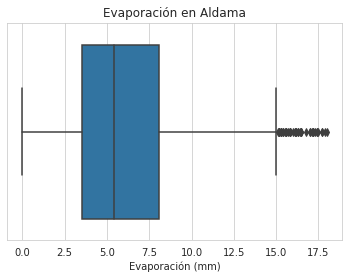

In [20]:
# Boxplot para evaporación
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Evap", orient="h")

plt.xlabel("Evaporación (mm)")
plt.title("Evaporación en Aldama");


# **Analizando periodos de datos**

In [ ]:
# La toma de datos comienza en 1976 y finaliza en 2012, precisamente este rango de datos es de interes pues queremos analizar los ultimos 30 años.

df_muestra = df_c1[(df_c1["Año"] >= 1976) & (df_c1["Año"] <=2012)]
# df_muestra

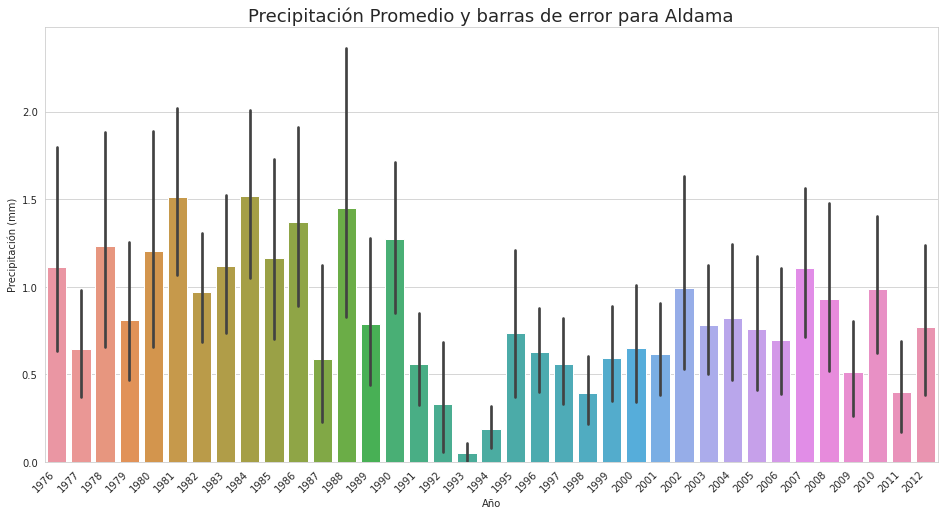

In [23]:
# Grafica de precipitación del periodo de interes
# Agrupada por Año
sns.set_style("whitegrid")
# Para dimenzionar la grafica utilizamos la instrucción "figsize" parametros (16,8) (largo,ancho)
plt.figure(figsize=(16,8))

# Se crea la grafica y se asigna a "g" para ajustar la etiqueta de año en los datos y que más agradable al ojo
g=sns.barplot(data=df_muestra, x= "Año", y="Precip")
# Se rotan 45 grados las etiquetas
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
# se ajusta el tamaño del titulo
plt.title("Precipitación Promedio y barras de error para Aldama", fontsize=18)
plt.show()

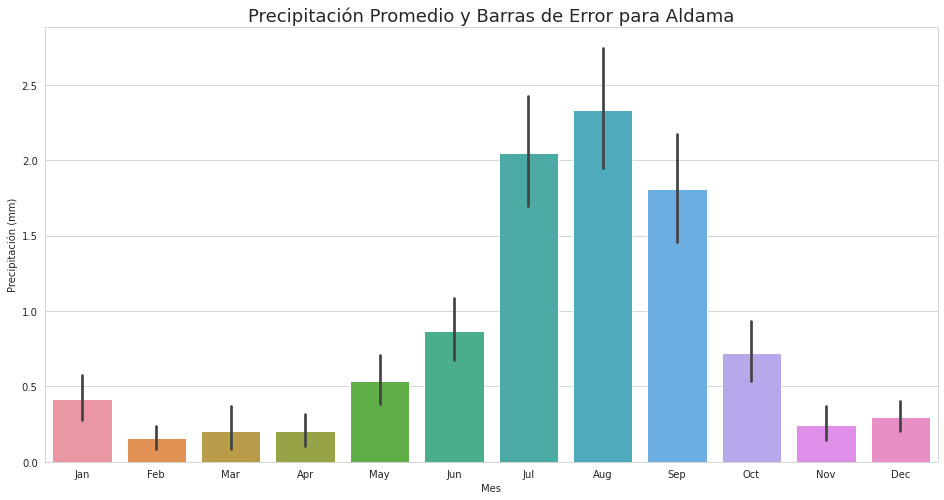

In [27]:
# Misma gráfica (precipitación) agrupada ahora por mes, en el rango de datos de interes.
sns.set_style("whitegrid")
# Se dimensiona
plt.figure(figsize=(16,8))

sns.barplot(data=df_muestra, x= "Mes", y="Precip")

# No será necesario ajustar las etiquetas pues no se amontonan

plt.xlabel("Mes")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Barras de Error para Aldama", fontsize=18)
plt.show()

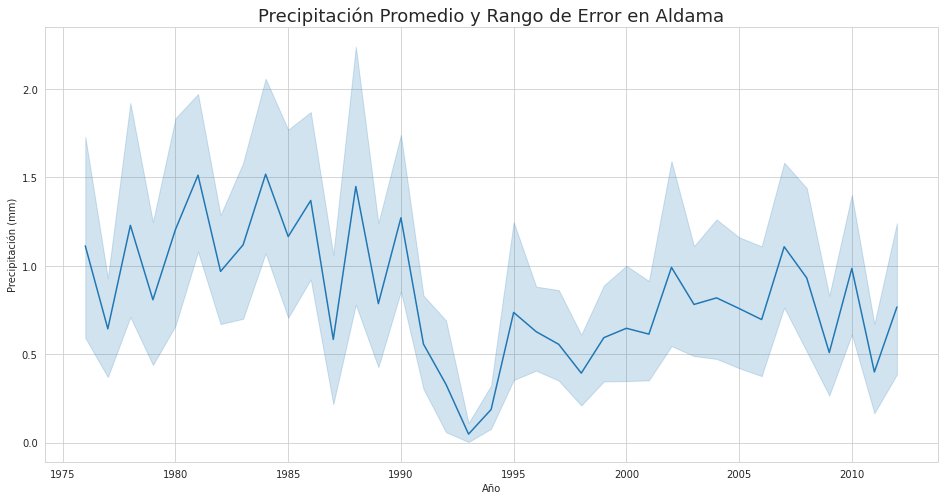

In [28]:
# Es momento ahora de graficar los datos con lineas.
# Esto se hará con el comando sns.lineplot
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x="Año", y="Precip")
plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Rango de Error en Aldama", fontsize=18)
plt.show()

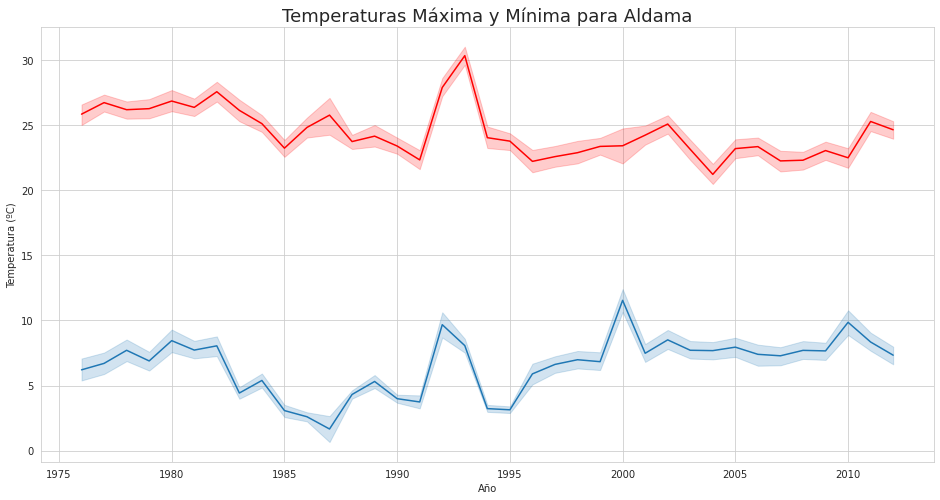

In [29]:
# Gráfica de lineas para temperatura máxima y mínima
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x = "Año", y= "Tmax", color="r")
sns.lineplot(data=df_muestra, x="Año", y = "Tmin")

plt.xlabel("Año")
plt.ylabel("Temperatura (ºC)")
plt.title("Temperaturas Máxima y Mínima para Aldama", fontsize=18)
plt.show()


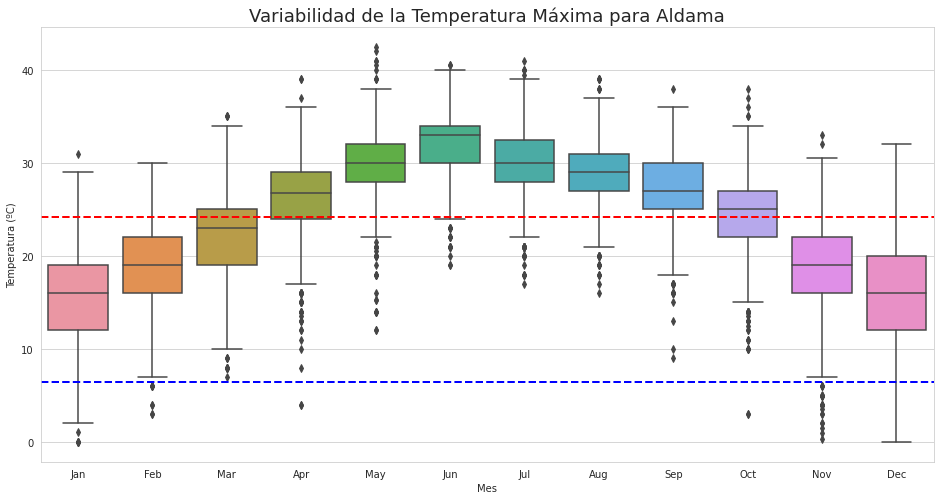

In [32]:
# Ahora se realizarán graficas boxplot agrupadas por mes.
# En primer lugar, de las temperaturas máximas en los ultimos 36 años:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x = "Mes", y= "Tmax", orient="v")
Tmax_p=df_muestra.Tmax.mean()
Tmin_p=df_muestra.Tmin.mean()
#axhline grafica una linea horizontal, linestyle da el tipo de linea
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Máxima para Aldama", fontsize=18)
plt.show()





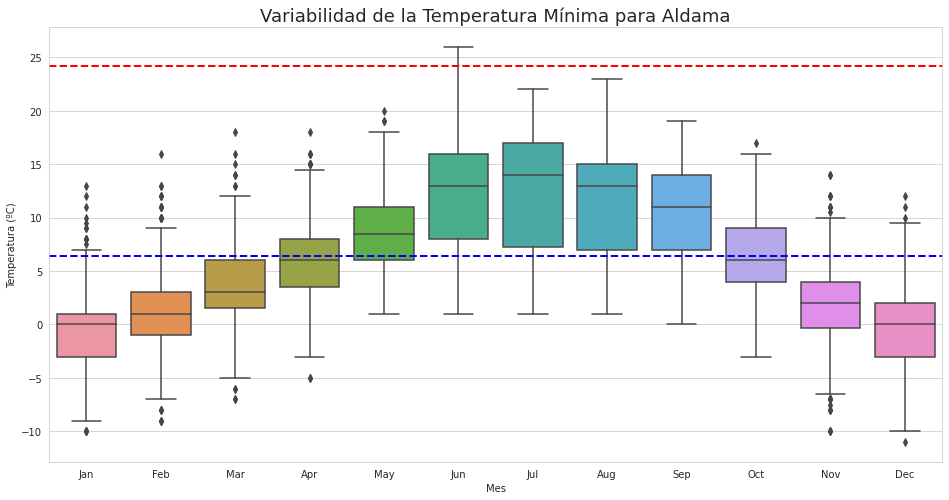

In [34]:
# Diagrama de cajas para la temperatura minima, agrupada por mes, en los ultimos 36 años
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x="Mes", y="Tmin", orient="v")
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Mínima para Aldama", fontsize=18)
plt.show()

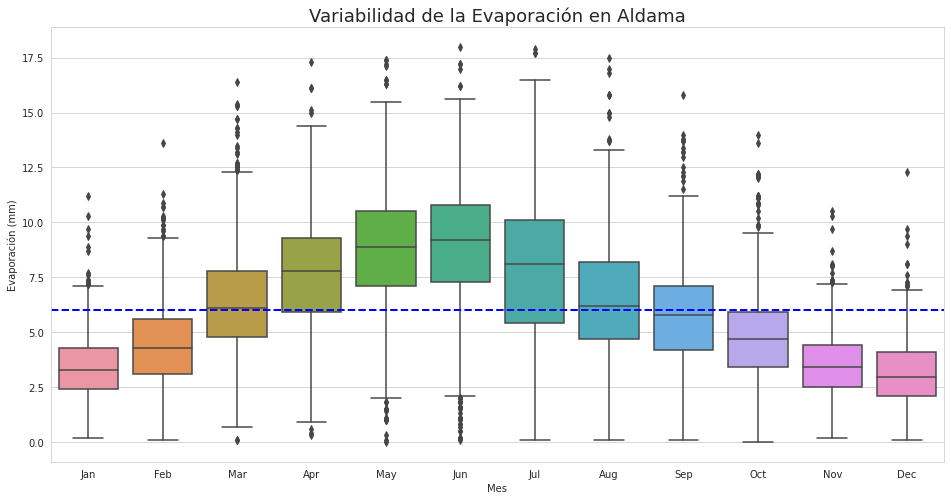

In [37]:
# Diagrama de cajas para la evaporación por mes en los ultimos 36 años
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

Evap_prom=df_muestra.Evap.mean()

sns.boxplot(data=df_muestra, x="Mes", y="Evap", orient="v")
plt.axhline(y=Evap_prom, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Evaporación (mm)")
plt.title("Variabilidad de la Evaporación en Aldama", fontsize=18)
plt.show()
